# Import Modules

In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

# Ignore anoying warnings 
import warnings
warnings.filterwarnings("ignore")

# Set Up Dataset

In [3]:
split = ['train[:70%]', 'train[70%:]']

In [4]:
(train_ds, test_ds), ds_info = tfds.load('cats_vs_dogs',
                                         split=split,
                                         as_supervised=True,
                                         shuffle_files=True,
                                         with_info=True)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-13 15:08:00.537647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-13 15:08:00.537956: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Visualize Dataset

2022-09-13 15:08:00.646912: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


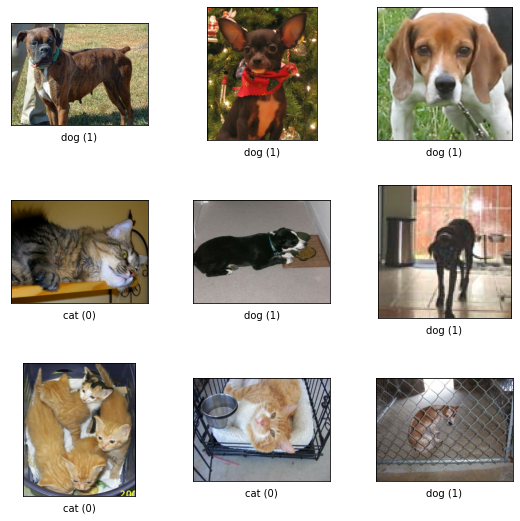

In [5]:
fig = tfds.show_examples(train_ds, ds_info)

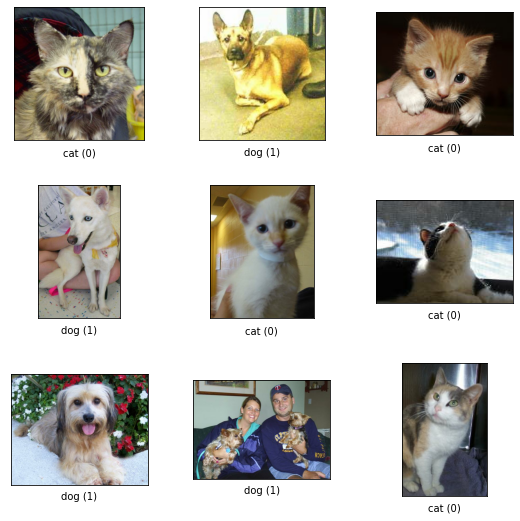

In [6]:
fig = tfds.show_examples(test_ds, ds_info)

# Preprocess Dataset

In [7]:
def preprocess(img, label):
    # resize to get images with all same size
    img = tf.image.resize(img, [200, 200])
    # normalize to get values between 0 and 1
    img = img / 255
    return img, label

In [8]:
train_ds = train_ds.map(preprocess).batch(32)

In [9]:
test_ds = test_ds.map(preprocess).batch(32)

# Build Model

In [10]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'])
# plt.grid()
# plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 batch_normalization_2 (Batc  (None, 198, 198, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 batch_normalization_3 (Batc  (None, 97, 97, 32)      

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=5, 
                    validation_data=test_ds)

Epoch 1/5


2022-09-13 15:08:21.868185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


169/509 [========>.....................] - ETA: 38s - loss: 1.3175 - accuracy: 0.5769

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


204/509 [===========>..................] - ETA: 34s - loss: 1.1964 - accuracy: 0.5884

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


274/509 [===============>..............] - ETA: 26s - loss: 1.0447 - accuracy: 0.6063

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


455/509 [=========================>....] - ETA: 6s - loss: 0.8574 - accuracy: 0.6418

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


476/509 [===========================>..] - ETA: 3s - loss: 0.8440 - accuracy: 0.6453

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


498/509 [============================>.] - ETA: 1s - loss: 0.8308 - accuracy: 0.6487

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


504/509 [============================>.] - ETA: 0s - loss: 0.8278 - accuracy: 0.6493

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.8251 - accuracy: 0.6495

2022-09-13 15:09:19.960305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 65s 126ms/step - loss: 0.8251 - accuracy: 0.6495 - val_loss: 0.6817 - val_accuracy: 0.6326
Epoch 2/5
166/509 [========>.....................] - ETA: 38s - loss: 0.5422 - accuracy: 0.7272

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/509 [==========>...................] - ETA: 34s - loss: 0.5379 - accuracy: 0.7313

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


275/509 [===============>..............] - ETA: 26s - loss: 0.5249 - accuracy: 0.7368

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


456/509 [=========================>....] - ETA: 5s - loss: 0.5087 - accuracy: 0.7487

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


475/509 [==========================>...] - ETA: 3s - loss: 0.5083 - accuracy: 0.7492

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


497/509 [============================>.] - ETA: 1s - loss: 0.5066 - accuracy: 0.7501

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


502/509 [============================>.] - ETA: 0s - loss: 0.5063 - accuracy: 0.7502

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.7500

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 63s 124ms/step - loss: 0.5061 - accuracy: 0.7500 - val_loss: 0.4970 - val_accuracy: 0.7614
Epoch 3/5
168/509 [========>.....................] - ETA: 38s - loss: 0.4611 - accuracy: 0.7866

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/509 [==========>...................] - ETA: 34s - loss: 0.4589 - accuracy: 0.7868

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


273/509 [===============>..............] - ETA: 26s - loss: 0.4487 - accuracy: 0.7896

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


455/509 [=========================>....] - ETA: 6s - loss: 0.4290 - accuracy: 0.8011

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


475/509 [==========================>...] - ETA: 3s - loss: 0.4270 - accuracy: 0.8018

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


497/509 [============================>.] - ETA: 1s - loss: 0.4240 - accuracy: 0.8034

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


502/509 [============================>.] - ETA: 0s - loss: 0.4236 - accuracy: 0.8037

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.4230 - accuracy: 0.8038

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 66s 129ms/step - loss: 0.4230 - accuracy: 0.8038 - val_loss: 0.4987 - val_accuracy: 0.7518
Epoch 4/5
167/509 [========>.....................] - ETA: 39s - loss: 0.4036 - accuracy: 0.8187

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/509 [==========>...................] - ETA: 36s - loss: 0.3987 - accuracy: 0.8196

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


276/509 [===============>..............] - ETA: 28s - loss: 0.3882 - accuracy: 0.8257

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


455/509 [=========================>....] - ETA: 6s - loss: 0.3670 - accuracy: 0.8366

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


474/509 [==========================>...] - ETA: 4s - loss: 0.3643 - accuracy: 0.8380

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


497/509 [============================>.] - ETA: 1s - loss: 0.3616 - accuracy: 0.8395

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


502/509 [============================>.] - ETA: 0s - loss: 0.3609 - accuracy: 0.8400

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.8400

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 71s 140ms/step - loss: 0.3604 - accuracy: 0.8400 - val_loss: 0.5526 - val_accuracy: 0.7613
Epoch 5/5
165/509 [========>.....................] - ETA: 43s - loss: 0.3560 - accuracy: 0.8403

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/509 [==========>...................] - ETA: 38s - loss: 0.3530 - accuracy: 0.8425

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


276/509 [===============>..............] - ETA: 29s - loss: 0.3460 - accuracy: 0.8453

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


455/509 [=========================>....] - ETA: 7s - loss: 0.3234 - accuracy: 0.8585

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


476/509 [===========================>..] - ETA: 4s - loss: 0.3223 - accuracy: 0.8590

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


498/509 [============================>.] - ETA: 1s - loss: 0.3190 - accuracy: 0.8612

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


503/509 [============================>.] - ETA: 0s - loss: 0.3181 - accuracy: 0.8616

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.8613

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 76s 149ms/step - loss: 0.3187 - accuracy: 0.8613 - val_loss: 0.5594 - val_accuracy: 0.7778


# Evaluation

<h3>Results:</h3>

**Model 1:**<br>
`loss: 0.0220`
`accuracy: 0.9937`
`val_loss: 1.6510`
`val_accuracy: 0.7249`<br>
We can clearly see that the model had overfitted the dataset.

**Model 2:** *Added Dropout* <br>
`loss: 0.2515`
`accuracy: 0.8919`
`val_loss: 0.5967`
`val_accuracy: 0.7674`

**Model 3:** *Shuffle Dataset* <br>
`loss: 0.3687`
`accuracy: 0.8346`
`val_loss: 0.4631`
`val_accuracy: 0.7818`

**Model 3:** *Added Batch Normalization* <br>
`loss: 0.3577`
`accuracy: 0.8403`
`val_loss: 0.4923`
`val_accuracy: 0.7967`

#### Compare Train Accuracy & Validation Accuracy

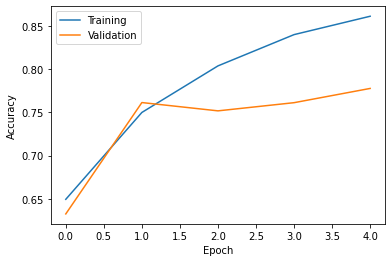

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

#### Compare Train Loss & Validation Loss

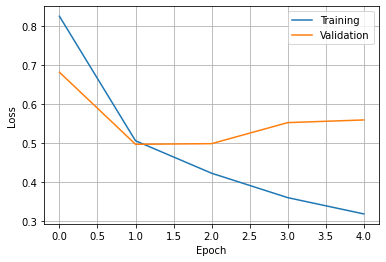

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

# Save Model

In [18]:
model.save('model.h5')

# Test the Model

In [2]:
from tensorflow.keras.utils import load_img, img_to_array

def load_image(image):
    img = load_img(image, target_size=(200, 200))
    img = img_to_array(img)
    img = img.reshape(1, 200, 200, 3)
    return img

In [8]:
img = load_image('static/images/cat.jpeg')

In [9]:
import tensorflow as tf

model = tf.keras.models.load_model('model.h5')

In [10]:
result = model.predict(img)
result

2022-09-13 15:30:55.857069: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-13 15:30:55.906575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 477ms/step


array([[0.]], dtype=float32)

**Labels:**<br>
0: `cat`<br>
1: `dog`